## MONITORAMENTO MENSAL DO CONSUMO DE ÁGUA DA UFSC 2013 - 2024

#### Importação e estrutura de organização dos dados MENSAIS 2013/01 a 2024/09
###### - Parte 3 - Visualização de informações a partir de um único df
- Passo 0 - Funções para carregar csv unico com com todos os dados de água de 2023 ao momento presente
- Passo 1 - Gerar df única com todos os dados de água de 2023 ao momento presente
- Passo 2 - Extrair da df única apenas as colunas de interesse
- Passo 3 - Salvar groupby_anos_soma em csv na pasta produtos
- 
###### - Parte 4 - Visualização gráfica
- Passo 0 - Carregar função gráfico de barras, gerar gráficos de barras e exportar figuras
- Passo 1 - Análise da série temporal utilizando um lineplot.

-- Moodle: Análise da série temporal utilizando um lineplot. Neste lineplot vocês devem apresentar a série e uma mancha com os valores mínimos e máximos.

- Passo 2 - Gerar lineplot para volume faturado por ano
- Passo 3 - Gerar lineplot de toda a série de volume faturado agrupado por mês

-- Moodle: Análise da série temporal através de um boxplot. Série toda e agregando períodos (ex: hora do dia, dia da semana, mês do ano, estação ano, período decadal)

- Passo 4 - Reorganização de dados_agua_df por ano e mês e estatísticas
- Passo 5 - Boxplot dos dados agregados mensais (volume_faturado_por_mes_ano)

-- Complemento Lineplot
- Passo 6 - Lineplot - comparação do volume para cada mês ao longo dos anos
- Passo 7 - Lineplot - comparação do volume para cada ano ao longo dos meses

##### - Parte 5 - Análises de tendência e sazonalidade (testes Mann-Kendal e Thiel-sen)
- Passo 1 - teste de Mann-Kendall para tendencia por ano para todos os meses, analisa os dados de linha do df volume_faturado_por_mes_ano
- Passo 2 -  teste de Mann-Kendall para tendencia por mês entre os anos, analisa os dados de coluna do df volume_faturado_por_mes_ano
- Passo 3 - teste de Mann-Kendall para toda a série de dados de volume faturado do df dados_agua_df_por_mes_ano (volume agrupado por mes e ano em única)
- Passo 4 - teste de Theil-Sen para toda a série de dados de volume faturado do df dados_agua_df_por_mes_ano (volume agrupado por mes e ano em única coluna)
- Passo 5 - teste de Mann-Kendall para as estações

##### - Conclusões

###### Nome: Djesser Zechner Sergio

###### https://github.com/Djesser/ENS410064.git

In [40]:
import os
import pandas as pd
import openpyxl
from datetime import date
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import glob
import seaborn as sns
import pymannkendall as mk
from scipy import stats


### - Parte 3 - Início ##############################################################################

# Passo 0 - funções para carregar csv unico com com todos os dados de água de 2023 ao momento presente

#Main def1
def main_abrir_csv_unico_func():
    dados_agua_df = abrir_csv_unico_func(pasta_produtos_func(pasta_projeto_func()))
    return dados_agua_df   
    
#sub-def 1: -------------------------------------
def pasta_projeto_func():
    pasta_projeto = r'I:\Meu Drive\UFSC\PPGEA 2024\Python_for_env\ENS410064\Projeto'
    return pasta_projeto

#sub-def 2: -------------------------------------
def pasta_produtos_func(pasta_projeto):
    pasta_produtos = os.path.join(pasta_projeto, 'Dados', 'Produtos')
    return pasta_produtos
        
#sub-def 3: -------------------------------------
def abrir_csv_unico_func(pasta_produtos):
    os.chdir(pasta_produtos)
    caminho_dados_agua_csv = os.path.join(pasta_produtos, 'dados_agua_df.csv')
    dados_agua_df = pd.read_csv(caminho_dados_agua_csv)
    return dados_agua_df

#sub-def 4: ------------------------------------
def pasta_figuras_func(pasta_projeto):
    # mudando para pasta de figuras
    pasta_figuras = os.path.join(pasta_projeto, 'Figuras')
    print('Pasta figuras: ', pasta_figuras)
    return pasta_figuras   

############## execução

# Passo 1 - gerar df única com todos os dados de água de 2023 ao momento presente

dados_agua_df = main_abrir_csv_unico_func()
dados_agua_df['ANO'] = dados_agua_df['ANO'].astype('int')

# Passo 2 - Extrair da df única apenas as colunas de interesse acumulada por ano (groupby_anos_soma)
    # VOLUME_FATURADO	
    # VALOR_AGUA	
    # VALOR_ESGOTO	
    # DESCONTOS	
    # OUTROS	
    # MULTAS_JUROS	
    # VALOR_TOTAL

groupby_anos_soma = dados_agua_df.iloc[:,[18,21, 22, 23 ,24 ,25, 26]].groupby(dados_agua_df['ANO']).sum().round(2)
display(groupby_anos_soma.round(2))
groupby_anos_soma_describe = groupby_anos_soma.describe().round(2)

# Passo 3 - Salvar groupby_anos_soma em csv na pasta produtos
pasta_projeto = pasta_projeto_func()
os.chdir(pasta_produtos_func(pasta_projeto))
groupby_anos_soma.to_csv('groupby_anos_soma.csv')
groupby_anos_soma_describe.to_csv('groupby_anos_soma_describe.csv')
os.chdir(pasta_projeto)



VOLUME_FATURADO  VALOR_AGUA  VALOR_ESGOTO  DESCONTOS     OUTROS  \
ANO                                                                     
2013        399689.00  2853769.81    2140482.02 -473011.60       0.00   
2014        381685.00  2916140.66    2160137.27 -481284.83       0.00   
2015        424762.00  3509116.50    2556541.15 -576418.92     229.22   
2016        413896.00  3763534.60    2818958.43 -431515.21   10244.49   
2017        410132.00  4067488.27    3093897.21 -675949.77   33080.29   
2018        424491.66  4576319.45    3293931.47 -713484.02  188450.48   
2019        362614.41  3883324.48    3081085.35 -648955.87  108303.77   
2020        183841.00  2107155.36    1718506.68 -369524.11      70.88   
2021        177347.00  2160834.34    1716128.36 -393288.46   -7397.97   
2022        247128.00  3310370.69    2621609.01 -594878.77    -118.22   
2023        284444.15  4196376.88    3368482.32 -794049.60   -1597.18   
2024        216485.17  3547550.04    3191040.32 -663066.86  -12525.38   

      MULTAS_JUROS  VALOR_TOTAL  
ANO                              
2013      16485.79   4537726.02  
2014      18759.65   4613752.75  
2015      43826.12   5533294.07  
2016      98031.68   6259253.99  
2017       7263.93   6525779.93  
2018      17643.94   7365996.16  
2019    1300716.04   7724473.77  
2020       3596.60   3458965.11  
2021       4950.97   3481226.08  
2022       -103.78   5336878.99  
2023      36083.44   6797079.04  
2024      43815.39   6106813.51

### - Parte 4 - Visualização gráfica

Pasta figuras:  I:\Meu Drive\UFSC\PPGEA 2024\Python_for_env\ENS410064\Projeto\Figuras
linhas_index_gb Index([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024], dtype='int32', name='ANO')
colunas_gb Index(['VOLUME_FATURADO', 'VALOR_TOTAL'], dtype='object')
nº de colunas 2
UFSC Dados Água 2013 - 2024.png


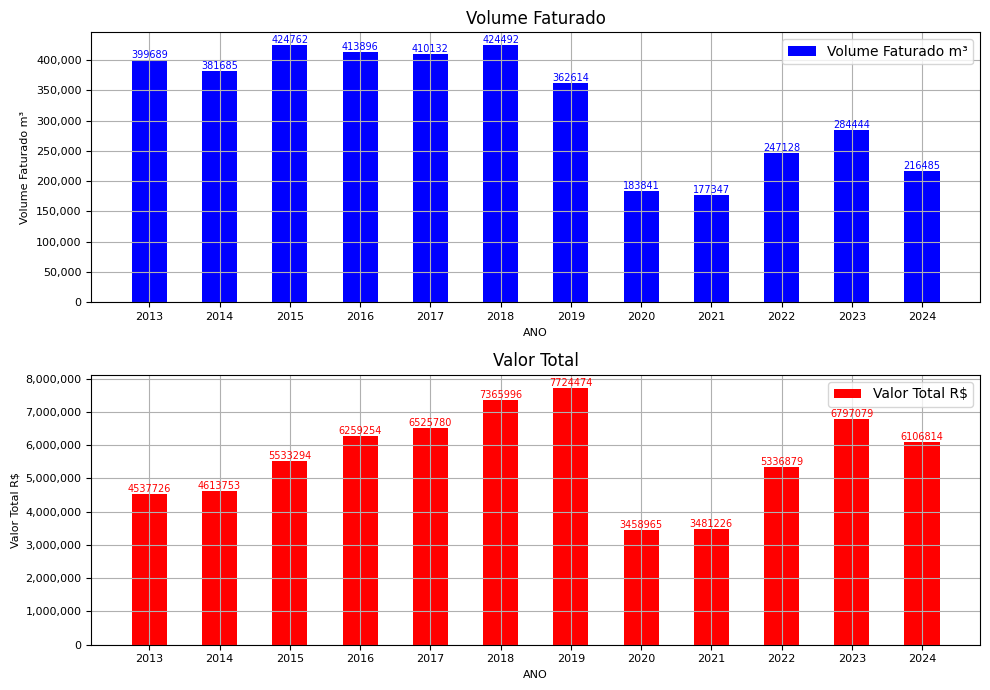

In [41]:
# - Passo 0 - Carregar função gráfico de barras, gerar gráficos de barras e exportar figuras

def format_tick_labels(x, pos):
  return '{0:,.0f}'.format(x)

def gerar_e_salvar_figuras_groupby_ano_soma(groupby_anos_soma):

    pasta_projeto = pasta_projeto_func()

    pasta_figuras = pasta_figuras_func(pasta_projeto)

    linhas_index_gb = groupby_anos_soma.index
    print('linhas_index_gb', linhas_index_gb)

    #seleção de colunas
    colunas = [0, -1]
    colunas_gb = groupby_anos_soma.columns[[colunas[0],colunas[1]]]
    print('colunas_gb',colunas_gb)
    print('nº de colunas', len(colunas_gb))
    lista_cores  =   ( 'b',  'r') #https://matplotlib.org/2.0.1/api/colors_api.html
    lista_unidades = ('m\u00B3', 'R$')
    #https://stackoverflow.com/questions/8651361/how-do-you-print-superscript
    #https://magictool.ai/tool/character-map-symbol/pt/?hex=00B3
          
    fig, axs = plt.subplots(len(colunas_gb),1,figsize = (10, 7))
    
    os.chdir(pasta_figuras)    
    
    for i, item in enumerate (colunas_gb):
       
        item = item.lower()
        try:
            nome = item.split('_')
            nome = nome[0].capitalize() + ' '+ nome [1].capitalize()
            y_label = nome + ' ' + lista_unidades[i]
        except:
            nome = item
            y_label = nome.capitalize() + ' ' + lista_unidades[i]
            
        xdata = groupby_anos_soma.index
        ydata = groupby_anos_soma.iloc[:,colunas[i]]
        
        bar = axs[i].bar(xdata, ydata , color=lista_cores[i], label = y_label, width=0.5)
        axs[i].bar_label(bar, fmt="%.0f", size=7, label_type="edge", color=lista_cores[i] )

        #https://www.pythoncheatsheet.org/cheatsheet/string-formatting
        #axs[i].yaxis.set_major_formatter(ticker.FormatStrFormatter("%.0f"))
        axs[i].set_ylabel(y_label, fontsize = 8)
        axs[i].set_xlabel(xdata.name, fontsize = 8)
        
        xticks = np.arange(min(xdata),max(xdata+1), 1)
        axs[i].set_xticks(xticks)
        axs[i].set_xticklabels(xticks, fontsize=8)

        yticks = axs[i].get_yticks()
        axs[i].tick_params(axis='y', labelsize=8)
        axs[i].yaxis.set_major_formatter(ticker.FuncFormatter(format_tick_labels))
        #axs[i].yaxis.set_major_formatter(ticker.EngFormatter())
        
        
        axs[i].set_title(nome)
        #axs[i].axhline(y=0.002,xmin=0,xmax=3,c="blue",linewidth=0.5,zorder=0)
        axs[i].grid() 
        #https://matplotlib.org/stable/users/explain/colors/colors.html#colors-def
        #handles, labels = ax.get_legend_handles_labels()
        #ax.legend(handles, labels)
        axs[i].legend() 
       
    # https://matplotlib.org/3.1.1/gallery/ticks_and_spines/tick-formatters.html
    
    #fig.title(f'UFSC Dados Água {groupby_anos_soma.index[0]} - {groupby_anos_soma.index[-1]}')
    fig.tight_layout()
    nome_imagem = f'UFSC Dados Água {groupby_anos_soma.index[0]} - {groupby_anos_soma.index[-1]}'
    nome_imagem = nome_imagem + ".png"
    imagem = fig.savefig(nome_imagem, dpi=100)
    print(nome_imagem)
    os.chdir(pasta_projeto)
    plt.show()

    return nome_imagem

nome_imagem = gerar_e_salvar_figuras_groupby_ano_soma(groupby_anos_soma)

- Moodle: análise da série temporal utilizando um lineplot. Neste lineplot vocês devem apresentar a série e uma mancha com os valores mínimos e máximos.

Pasta figuras:  I:\Meu Drive\UFSC\PPGEA 2024\Python_for_env\ENS410064\Projeto\Figuras


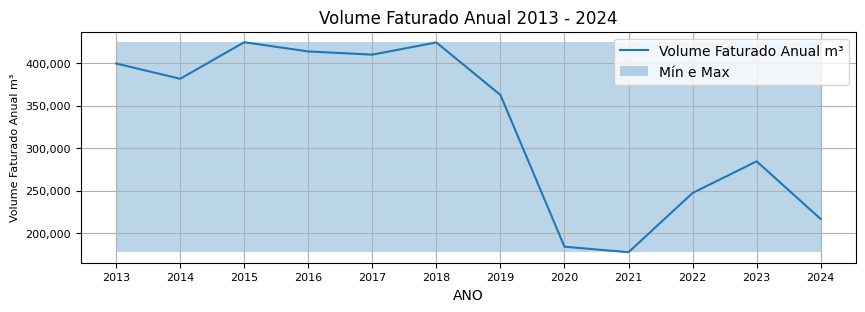

Img01 - Volume Faturado Anual 2013 - 2024.png


In [42]:
# Passo 1 - Carregar função lineplot para volume faturado por ano

def lineplot_func(data, xdata, ydata, ylabel, nome, xticks_passo):

  pasta_projeto = pasta_projeto_func()
  pasta_figuras = pasta_figuras_func(pasta_projeto)

  fig, ax = plt.subplots(1,1, figsize=(10, 3))
  sns.lineplot(data=data, label= ylabel)
  ax.fill_between(xdata, ydata.min(), ydata.max(), alpha=0.3, label='Mín e Max')

  xticks = np.arange(min(xdata),max(xdata+1), xticks_passo)
  ax.set_xticks(xticks)
  ax.set_xticklabels(xticks, fontsize=8)
  yticks = ax.get_yticks()
  ax.tick_params(axis='y', labelsize=8)
  ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_tick_labels))

  nome_imagem = f'{nome} {xdata[0]} - {xdata[-1]}'
  ax.set_title(nome_imagem)
  ax.set_xlabel(xdata.name)
  ax.set_ylabel(ylabel, fontsize=8)
  ax.legend()
  ax.grid(True)
  plt.show()

  os.chdir(pasta_figuras)
  nome_imagem = "Img01 - " +nome_imagem + ".png"
  imagem = fig.savefig(nome_imagem, dpi=100)
  print(nome_imagem)
  os.chdir(pasta_projeto)

# Passo 2 - Gerar lineplot para volume faturado por ano

#Volume Faturado por ano

data = groupby_anos_soma.iloc[:,0]
nome = data.name.lower().split('_')
nome = nome[0].capitalize() + ' '+ nome [1].capitalize() + ' Anual'
xdata = data.index
ydata = data
ylabel = nome + ' m\u00B3'
xticks_passo = 1

#Lineplot

lineplot_func(data, xdata, ydata, ylabel, nome, xticks_passo)

Pasta figuras:  I:\Meu Drive\UFSC\PPGEA 2024\Python_for_env\ENS410064\Projeto\Figuras


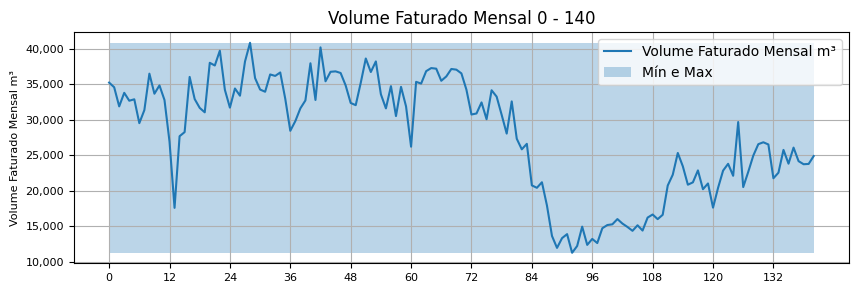

Img01 - Volume Faturado Mensal 0 - 140.png


In [43]:
# Passo 3 - Gerar lineplot de toda a série de volume faturado agrupado por mês
#### Reorganizando totais mensais:
#### - Agrupando dados por ano e por mês a partir de dados_agua_df com dados de volume faturado mensal

volume_faturado_por_mes_ano = dados_agua_df.groupby(['ANO', 'MES_N'])['VOLUME_FATURADO'].sum().reset_index().round(2)
valor_total_por_mes_ano = dados_agua_df.groupby(['ANO', 'MES_N'])['VALOR_TOTAL'].sum().reset_index().round(2)
dados_agua_df_por_mes_ano = pd.merge(volume_faturado_por_mes_ano, valor_total_por_mes_ano, on=['ANO', 'MES_N'])
dados_agua_df_por_mes_ano

#dados_agua_df_por_mes_ano = Volume Faturado

data = dados_agua_df_por_mes_ano.iloc[:,2]
nome = data.name.lower().split('_')
nome = nome[0].capitalize() + ' '+ nome [1].capitalize() + ' Mensal'
xdata = data.index
ydata = data
ylabel = nome + ' m\u00B3'
xticks_passo = 12

#### - lineplot de dados mensais agrupados

lineplot_func(data, xdata, ydata, ylabel, nome, xticks_passo)

- Moodle: análise da série temporal através de um boxplot. Série toda e agregando períodos (ex: hora do dia, dia da semana, mês do ano, estação ano, período decadal)

MES_N        1         2         3         4         5         6         7   \
ANO                                                                           
2013   35231.00  34578.00  31881.00  33792.00  32679.00  32879.00  29519.00   
2014   26911.00  17585.00  27679.00  28257.00  36030.00  32911.00  31667.00   
2015   31706.00  34401.00  33386.00  38207.00  40841.00  35867.00  34254.00   
2016   28441.00  29806.00  31602.00  32717.00  37952.00  32785.00  40193.00   
2017   32361.00  32052.00  35207.00  38625.00  36724.00  38214.00  33588.00   
2018   26202.00  35340.00  35091.00  36844.32  37277.33  37191.53  35488.17   
2019   30736.42  30881.95  32439.77  30070.38  34152.87  33254.71  30689.88   
2020   20752.00  20412.00  21193.00  17915.00  13629.00  11948.00  13322.00   
2021   13210.00  12628.00  14713.00  15166.00  15270.00  16005.00  15372.00   
2022   16650.00  15998.00  16608.00  20732.00  22255.00  25319.00  23439.00   
2023   17615.00  20403.00  22834.85  23791.34  22104.98  29676.14  20513.08   
2024   21755.39  22540.59  25750.96  23809.00  26074.58  24165.01  23731.47   

MES_N        8         9         10        11        12  
ANO                                                      
2013   31356.00  36494.00  33665.00  34836.00  32779.00  
2014   31046.00  38020.00  37640.00  39725.00  34214.00  
2015   33942.00  36379.00  36173.00  36659.00  32947.00  
2016   35418.00  36754.00  36813.00  36585.00  34830.00  
2017   31599.00  34731.00  30519.00  34633.00  31879.00  
2018   36098.54  37149.64  37054.84  36527.31  34226.97  
2019   28047.21  32581.54  27320.89  25832.79  26606.00  
2020   13887.00  11259.00  12213.00  14941.00  12370.00  
2021   14895.00  14352.00  15132.00  14388.00  16216.00  
2022   20847.00  21181.00  22863.00  20212.00  21024.00  
2023   22662.62  24944.07  26558.75  26825.47  26514.84  
2024   23775.38  24882.78       NaN       NaN       NaN

MES_N        1         2         3         4         5         6         7   \
count     12.00     12.00     12.00     12.00     12.00     12.00     12.00   
mean   25130.90  25552.13  27365.46  28327.17  29582.48  29184.62  27648.05   
std     7040.82   8135.87   7126.43   8026.55   9343.61   8304.12   8347.95   
min    13210.00  12628.00  14713.00  15166.00  13629.00  11948.00  13322.00   
25%    19967.75  19698.50  22424.39  23026.50  22217.50  25030.50  22707.52   
50%    26556.50  26173.30  29640.50  29163.69  33415.94  32832.00  30104.44   
75%    30978.82  32639.25  32676.33  34555.08  36862.33  33907.78  33754.50   
max    35231.00  35340.00  35207.00  38625.00  40841.00  38214.00  40193.00   

MES_N        8         9         10        11        12  
count     12.00     12.00     11.00     11.00     11.00  
mean   26964.48  29060.67  28722.95  29196.78  27600.62  
std     7657.24   9477.17   8920.86   9254.17   7877.91  
min    13887.00  11259.00  12213.00  14388.00  12370.00  
25%    22208.72  23957.34  24710.88  23022.40  23769.42  
50%    29546.60  33656.27  30519.00  34633.00  31879.00  
75%    32184.75  36559.00  36493.00  36556.16  33580.50  
max    36098.54  38020.00  37640.00  39725.00  34830.00

count       11.750000
mean     27861.359167
std       8292.725000
min      13227.750000
25%      22728.451667
50%      30676.686667
75%      34228.958333
max      37497.045000
dtype: float64

Pasta figuras:  I:\Meu Drive\UFSC\PPGEA 2024\Python_for_env\ENS410064\Projeto\Figuras


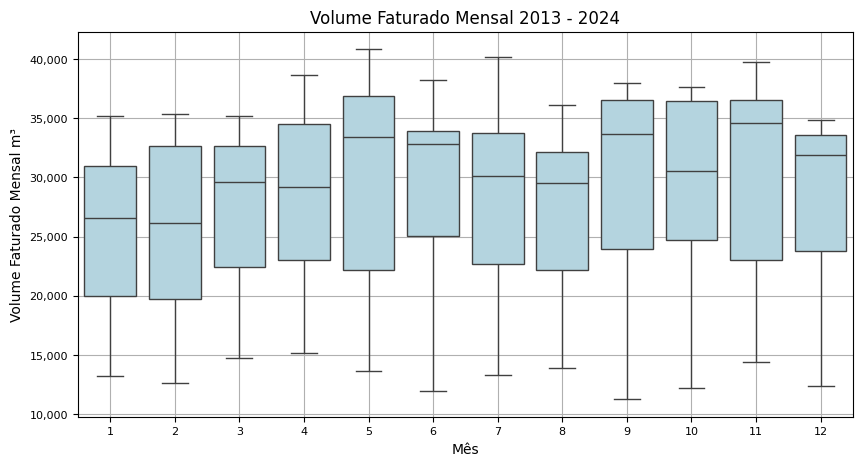

Img02 - Volume Faturado Mensal 2013 - 2024.png


In [45]:
# Passo 4 - Reorganização de dados_agua_df por ano e mês e estatísticas
# - Convertendo dados_agua_df_por_mes_ano em uma nova tabela de anos vs meses com dados de volume mensal

volume_faturado_por_mes_ano = dados_agua_df_por_mes_ano.pivot(index='ANO', columns='MES_N', values='VOLUME_FATURADO')

estatisticas_volume_faturado_por_mes_ano = volume_faturado_por_mes_ano.describe().round(2)


pasta_projeto = pasta_projeto_func()
os.chdir(pasta_produtos_func(pasta_projeto))
volume_faturado_por_mes_ano.to_csv('volume_faturado_por_mes_ano.csv')
estatisticas_volume_faturado_por_mes_ano.to_csv('estatisticas_volume_faturado_por_mes_ano.csv')


display(volume_faturado_por_mes_ano)
display(estatisticas_volume_faturado_por_mes_ano)

estatisticas_volume_faturado_por_mes_ano_mean = estatisticas_volume_faturado_por_mes_ano.mean(axis = 1)
estatisticas_volume_faturado_por_mes_ano_mean.to_csv('estatisticas_volume_faturado_por_mes_ano_mean.csv')
display(estatisticas_volume_faturado_por_mes_ano_mean)
os.chdir(pasta_projeto)

# Passo 5 - Boxplot dos dados agregados mensais (volume_faturado_por_mes_ano)

data = volume_faturado_por_mes_ano
nome = dados_agua_df_por_mes_ano.iloc[:,2].name
nome = nome.split('_')
nome = nome[0].capitalize() + ' '+ nome [1].capitalize() + ' Mensal'
#xdata = data.columns
#ydata = data.values
xlabel = "Mês"
ylabel = nome + ' m\u00B3'
xticks_passo = 1

def boxplot_func(data, xlabel, ylabel, nome, xticks_passo):

  pasta_projeto = pasta_projeto_func()
  pasta_figuras = pasta_figuras_func(pasta_projeto)

  fig, ax = plt.subplots(1,1, figsize=(10, 5))
  sns.boxplot(data = data, ax=ax, color='lightblue')

  ax.tick_params(axis='x', labelsize=8)
  ax.tick_params(axis='y', labelsize=8)
  ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_tick_labels))

  nome_imagem = f'{nome} {data.index[0]} - {data.index[-1]}'
  ax.set_title(nome_imagem)
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  
  ax.grid(True)
  plt.show()

  os.chdir(pasta_figuras)
  nome_imagem = "Img02 - " +nome_imagem + ".png"
  imagem = fig.savefig(nome_imagem, dpi=100)
  print(nome_imagem)
  os.chdir(pasta_projeto)

boxplot_func(data, xlabel, ylabel, nome, xticks_passo)

Pasta figuras:  I:\Meu Drive\UFSC\PPGEA 2024\Python_for_env\ENS410064\Projeto\Figuras


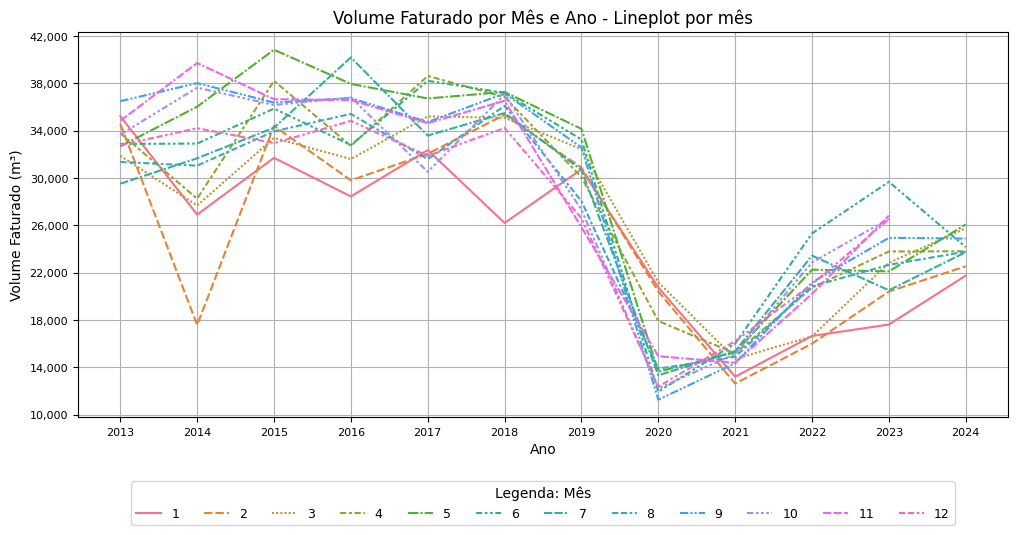

Img03 - Volume Faturado por Mês e Ano - Lineplot por mês.png


In [47]:
#Passo 6 - Lineplot - linhas por mês

pasta_projeto = pasta_projeto_func()
pasta_figuras = pasta_figuras_func(pasta_projeto)

fig, ax = plt.subplots (figsize=(12, 5))  # Ajuste o tamanho da figura conforme necessário
ax = sns.lineplot(data=volume_faturado_por_mes_ano, ax = ax)

plt.title('Volume Faturado por Mês e Ano - Lineplot por mês')
plt.xlabel('Ano')
plt.ylabel('Volume Faturado (m³)')
plt.xticks(pd.unique(volume_faturado_por_mes_ano.index), fontsize = 8)
y_max = volume_faturado_por_mes_ano.max().max()*1.1
y_max = round(y_max, -3)  
y_min = volume_faturado_por_mes_ano.min().min()*0.9
y_min = round(y_min, -3) 
divisor = 10
passo = round((y_max - y_min)/divisor, -3)
plt.yticks(np.arange(y_min, y_max, passo), fontsize=8)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_tick_labels))
plt.grid(True)
plt.legend(title='Legenda: Mês', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=len(volume_faturado_por_mes_ano.columns), fontsize = 9)
plt.show()

os.chdir(pasta_figuras)
nome_imagem = 'Volume Faturado por Mês e Ano - Lineplot por mês'
nome_imagem = "Img03 - " +nome_imagem + ".png"
imagem = fig.savefig(nome_imagem, dpi=100)
print(nome_imagem)
os.chdir(pasta_projeto)

Pasta figuras:  I:\Meu Drive\UFSC\PPGEA 2024\Python_for_env\ENS410064\Projeto\Figuras


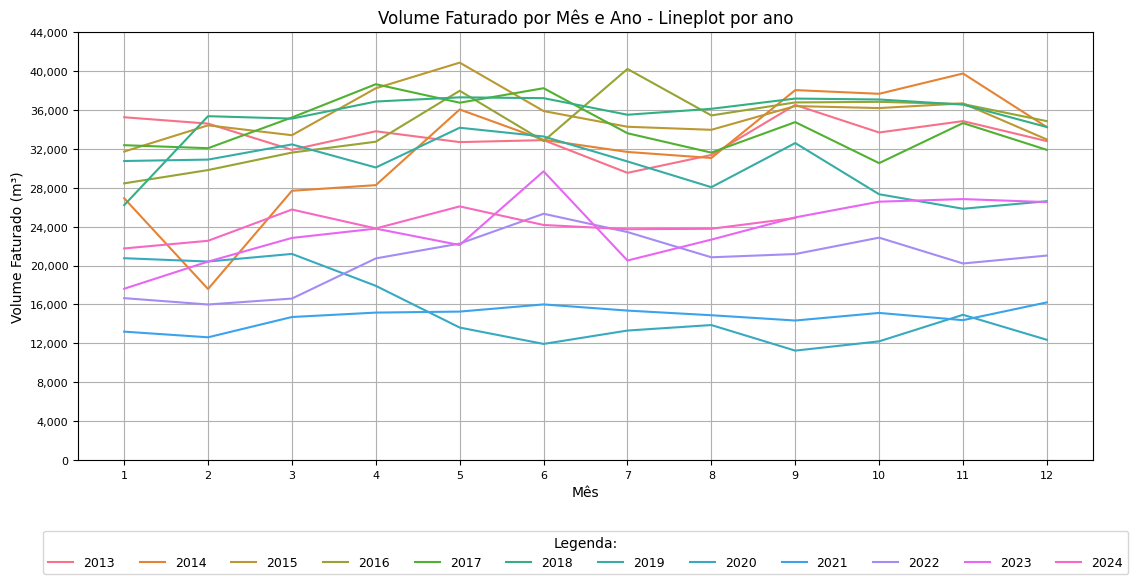

Img04 - Volume Faturado por Mês e Ano - Lineplot por ano.png


In [48]:
# Passo 7 - lineplot, linhas por ano

pasta_projeto = pasta_projeto_func()
pasta_figuras = pasta_figuras_func(pasta_projeto)

# Reorganizar os dados para o formato longo
volume_faturado_longo = volume_faturado_por_mes_ano.reset_index().melt(id_vars=['ANO'], var_name='MES', value_name='VOLUME_FATURADO')
volume_faturado_longo['MES'] = volume_faturado_longo['MES'].astype(int)

# Criar o lineplot
fif, ax = plt.subplots(figsize=(12, 6))
palette = sns.color_palette("husl", len(volume_faturado_por_mes_ano.columns))
ax = sns.lineplot(data=volume_faturado_longo, x='MES', y='VOLUME_FATURADO', hue='ANO', palette=palette)

plt.title('Volume Faturado por Mês e Ano - Lineplot por ano')
plt.xlabel('Mês')
plt.ylabel('Volume Faturado (m³)')
y_max = volume_faturado_longo.max().max()*1.1
y_max = round(y_max, -3)  
y_min = volume_faturado_longo.min().min()*0.9
y_min = round(y_min, -3) 
divisor = 10
passo = round((y_max - y_min)/divisor, -3)
plt.yticks(np.arange(y_min, y_max, passo), fontsize=8)
plt.xticks(range(1, 13), fontsize=8)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_tick_labels))
plt.grid(True)
plt.legend(title='Legenda:', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=len(volume_faturado_por_mes_ano.columns), fontsize = 9)
plt.tight_layout()
plt.show()

os.chdir(pasta_figuras)
nome_imagem = 'Volume Faturado por Mês e Ano - Lineplot por ano'
nome_imagem = "Img04 - " +nome_imagem + ".png"
imagem = fig.savefig(nome_imagem, dpi=100)
print(nome_imagem)
os.chdir(pasta_projeto)

##### - Parte 5 - Análises de tendência e sazonalidade (testes Mann-Kendal e Thiel-sen)

- Estimar a sazonalidade (se possível) e/ou tendência nos dados (está subindo? está descendo?). Dica: teste de Mann-Kendall para sazonalidade e Thiel-sen para tendência.

In [52]:
pasta_projeto = pasta_projeto_func()
os.chdir(pasta_produtos_func(pasta_projeto))

# Passo 1 - teste de Mann-Kendall para tendencia por ano para todos os meses, analisa os dados de linha do df volume_faturado_por_mes_ano
tendencia_por_ano = volume_faturado_por_mes_ano.apply(mk.original_test, axis=1)
print('tendencia_por_ano: ' , tendencia_por_ano)
tendencia_por_ano.to_csv('tendencia_por_ano.csv')

# Passo 2 - teste de Mann-Kendall para tendencia por mês entre os anos, analisa os dados de coluna do df volume_faturado_por_mes_ano
tendencia_por_mes = volume_faturado_por_mes_ano.apply(mk.original_test, axis=0)
print('tendencia_por_mes: ',tendencia_por_mes)
tendencia_por_mes.to_csv('tendencia_por_mes.csv')

# Passo 3 - teste de Mann-Kendall para toda a série de dados de volume faturado do df dados_agua_df_por_mes_ano (volume agrupado por mes e ano em única coluna)
tendencia_Mann_Kendall = mk.original_test(dados_agua_df_por_mes_ano.iloc[:,2])
print('teste_Mann_Kendall em toda série: ',tendencia_Mann_Kendall)
tendencia_Mann_Kendall_dict = {
    'trend': tendencia_Mann_Kendall.trend,
    'h': tendencia_Mann_Kendall.h,
    'p': tendencia_Mann_Kendall.p,
    'z': tendencia_Mann_Kendall.z,
    'Tau': tendencia_Mann_Kendall.Tau,
    's': tendencia_Mann_Kendall.s,
    'var_s': tendencia_Mann_Kendall.var_s,
    'slope': tendencia_Mann_Kendall.slope,
    'intercept': tendencia_Mann_Kendall.intercept
}
tendencia_Mann_Kendall_df = pd.DataFrame([tendencia_Mann_Kendall_dict]) 

tendencia_Mann_Kendall_df.to_csv('tendencia_Mann_Kendall.csv', index=False) 

os.chdir(pasta_projeto)

tendencia_por_ano:  ANO
2013    (no trend, False, 0.7317017232242102, -0.34286...
2014    (increasing, True, 0.004931500366306407, 2.811...
2015    (no trend, False, 0.6312218204782534, 0.480007...
2016    (increasing, True, 0.03352416523500468, 2.1257...
2017    (no trend, False, 0.303673214899419, -1.028588...
2018    (no trend, False, 0.5371338571769022, 0.617152...
2019    (no trend, False, 0.06410357671243583, -1.8514...
2020    (decreasing, True, 0.03352416523500468, -2.125...
2021    (no trend, False, 0.19261627432960227, 1.30287...
2022    (no trend, False, 0.19261627432960227, 1.30287...
2023    (increasing, True, 0.016393316888809073, 2.400...
2024    (no trend, False, 0.34808262363292397, 0.93831...
dtype: object
tendencia_por_mes:  MES_N           1             2             3             4             5   \
0       decreasing      no trend      no trend      no trend      no trend   
1             True         False         False         False         False   
2         0.

In [53]:
# Passo 4 - teste de Theil-Sen para toda a série de dados de volume faturado do df dados_agua_df_por_mes_ano (volume agrupado por mes e ano em única coluna)

pasta_projeto = pasta_projeto_func()
os.chdir(pasta_produtos_func(pasta_projeto))

data = volume_faturado_por_mes_ano.stack().reset_index(drop=True).values
time_index = np.arange(len(data))
theil_sen_slope, theil_sen_intercept, _, _ = stats.mstats.theilslopes(data, time_index)

print("Theil-Sen slope:", theil_sen_slope)
print("Theil-Sen intercept:", theil_sen_intercept)

theil_sen_dict = {
    'Theil-Sen slope': theil_sen_slope,
    'Theil-Sen intercept': theil_sen_intercept}
    
theil_sen_df = pd.DataFrame([theil_sen_dict]) 
theil_sen_df.to_csv('theil_sen.csv', index=False)

os.chdir(pasta_projeto)

Theil-Sen slope: -114.77464932126696
Theil-Sen intercept: 38553.22545248869


In [54]:
# Passo 5 - Teste de Mann-Kendall para as estações
#Estações do ano
def estacoes_func(mes):
    if mes in [1, 2, 3]:
        return 'Ver'
    elif mes in [4, 5, 6]:
        return 'Out'
    elif mes in [7, 8, 9]:
        return 'Inv'
    elif mes in [10, 11, 12]:
        return 'Pri'
    else:
        return 'N'  # Handle any unexpected month values

pasta_projeto = pasta_projeto_func()
os.chdir(pasta_produtos_func(pasta_projeto))

dados_agua_df_por_mes_ano['Estac'] = dados_agua_df_por_mes_ano['MES_N'].apply(estacoes_func)

estacoes_mann_kendall = dados_agua_df_por_mes_ano.groupby('Estac')['VOLUME_FATURADO'].apply(mk.original_test)
print('Teste de Mann-Kendall para as estações :', estacoes_mann_kendall)
estacoes_mann_kendall.to_csv('estacoes_mann_kendall.csv')

os.chdir(pasta_projeto)

Teste de Mann-Kendall para as estações : Estac
Inv    (decreasing, True, 0.001652787718636528, -3.14...
Out    (decreasing, True, 0.004052978473572333, -2.87...
Pri    (decreasing, True, 7.780085950059856e-05, -3.9...
Ver    (decreasing, True, 0.0013699425719619907, -3.2...
Name: VOLUME_FATURADO, dtype: object


### Conclusões

Código de Projeto_dados_agua_03_graficos_e_analises.ipynb:

- Parte 3 e 4:  Tabelas e Gráficos gerados tanto em barras, linhas e boxplot do perfil de consumo anual e mensal de água da UFSC entre 2013 e 2024 (setembro foi a última atualização). A inclusão de novos dados pode ser feita a partir da planilha excel, ou rotina para incluir df do mês na df única, na rotina do arquivo Projeto_dados_agua_02_gerar_pd_unico.ipynb (a ser realizado).

- Parte 3 e 4: Análise gráfica do consumo: Consumo anual com redução após 2018. Em 2020, 2021 e 2022 consumo foi influenciado pela pandemia e não pe representativo. Consumo de 2023 e 2024 em aumento, porém menor que o consumo de 2013 a 2019.

- Boxplot mostrou que maiores medianas ocorrem nos meses 5, 9 e 11 (maio, setembro e novembro), e menores em 1, 2 e 8 (janeiro, fevereiro e agosto). os períodos representam o recesso acadêmico de férias.

- Lineplot de meses ao longo dos anos mostrou que fevereiro de 2013 apresentou consumo muito abaixo do padrão para o mês de fevereiro, o que precisa ser checado na planilha original de dados.

- Lineplot de anos ao longo de meses mostrou pouca variação de consumo ao longo do mesmo ano, com exceção dos anos de 2013 e 2023, onde há variações abruptas de consumo em algum dos meses, também precisa ser verificado as razões da variação.

- No passo 4 foi calculado a média das estatísticas do describe de cada mês, variável 'estatisticas_volume_faturado_por_mes_ano_mean', que retornou desvio padrão médio de 8292 m3, o que representa um valor médio de variação do consumo mensal para maior ou menor. A média mensal foi de 27.861 m3.
  
- Parte 5: Análise de tendência para toda a série por Mann-Kendall e Theil-Sen retornou o mesmo resultado de redução do consumo:
    - Theil-Sen slope: -114.77464932126696 e Theil-Sen intercept: 38553.22545248869
    - Mann_Kendall_Test(trend='decreasing', slope=-114.77464932126696, intercept=38553.22545248869)

- Parte 5: Desagregação anual e mensal
    - Análise de tendência por ano indicou que os anos de 2013, 2016 e 2023 apresentaram aumento, enquanto o ano de 2020 apresentou redução, e os demais anos não apresentaram tendência.
    - Análise de tendência por mês ao longo dos anos indicou que o consumo tem reduzido nos meses 1, 9, 10 e 11, e nos demais meses não apresentaram tendência.

- Parte 5: Sazonalidade

  - Análise sazonal em estações do volume consumido do ano mostrou que todas as estações estão com redução de consumo.